<a href="https://colab.research.google.com/github/VasavSrivastava/MAT422/blob/main/HW3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**1.4.1 Singular Value Decomposition**

#####Singular Value Decomposition (SVD) is a matrix factorization method that decomposes any $m \times n$ matrix A into three matrices: $A = U \Sigma V^T$, where $U$ is an $m \times m$ orthogonal matrix of left singular vectors, $\Sigma$ is an $m \times n$ diagonal matrix of singular values, and $V^T$ is the transpose of an $n \times n$ orthogonal matrix of right singular vectors. SVD is widely used in dimensionality reduction, matrix approximation, and solving linear systems.


In [1]:
import numpy as np

# Define a matrix A (3x3 example)
A = np.array([[1, 2, 3],
              [4, 5, 6],
              [7, 8, 9]])

# Perform Singular Value Decomposition
U, Sigma, VT = np.linalg.svd(A)

# Output the results
print("Matrix A:")
print(A)

print("\nMatrix U (Left Singular Vectors):")
print(U)

print("\nSingular Values (Diagonal elements of Sigma):")
print(Sigma)

print("\nMatrix V^T (Right Singular Vectors):")
print(VT)

# If you want to reconstruct the original matrix
Sigma_full = np.zeros_like(A, dtype=float)
np.fill_diagonal(Sigma_full, Sigma)
A_reconstructed = np.dot(U, np.dot(Sigma_full, VT))

print("\nReconstructed Matrix A:")
print(A_reconstructed)


Matrix A:
[[1 2 3]
 [4 5 6]
 [7 8 9]]

Matrix U (Left Singular Vectors):
[[-0.21483724  0.88723069  0.40824829]
 [-0.52058739  0.24964395 -0.81649658]
 [-0.82633754 -0.38794278  0.40824829]]

Singular Values (Diagonal elements of Sigma):
[1.68481034e+01 1.06836951e+00 4.41842475e-16]

Matrix V^T (Right Singular Vectors):
[[-0.47967118 -0.57236779 -0.66506441]
 [-0.77669099 -0.07568647  0.62531805]
 [-0.40824829  0.81649658 -0.40824829]]

Reconstructed Matrix A:
[[1. 2. 3.]
 [4. 5. 6.]
 [7. 8. 9.]]


#**1.4.2 Low-Rank Matrix Approximations**

#####Low-rank matrix approximation is a technique used to approximate a matrix by another matrix with a lower rank, capturing its most important features while discarding less significant or noisy information. This is done using Singular Value Decomposition (SVD), where only the largest singular values and their corresponding singular vectors are kept, reducing the matrix's dimensionality. The result is a matrix $A_k$ that approximates the original matrix $A$ but with reduced complexity. If $A = U \Sigma V^T$, the low-rank approximation $A_k$ is given by $A_k = U_k \Sigma_k V_k^T$, where $U_k$, $\Sigma_k$, and $V_k^T$ represent the truncated matrices. Low-rank matrix approximations are commonly used in data compression, noise reduction, and dimensionality reduction techniques like Principal Component Analysis (PCA).

In [2]:
import numpy as np

# Define a sample matrix A (5x5 matrix)
A = np.array([[1, 2, 3, 4, 5],
              [6, 7, 8, 9, 10],
              [11, 12, 13, 14, 15],
              [16, 17, 18, 19, 20],
              [21, 22, 23, 24, 25]])

# Perform Singular Value Decomposition
U, Sigma, VT = np.linalg.svd(A, full_matrices=False)

# Print the original matrix and its singular values
print("Original Matrix A:")
print(A)

print("\nSingular Values:")
print(Sigma)

# Create a low-rank approximation by keeping only the top 2 singular values
k = 2  # Number of singular values to keep

# Reconstruct the matrix using only the top k singular values
Sigma_k = np.diag(Sigma[:k])
U_k = U[:, :k]
VT_k = VT[:k, :]

# Low-rank approximation of A
A_k = np.dot(U_k, np.dot(Sigma_k, VT_k))

# Print the low-rank approximated matrix
print("\nLow-rank approximation (k=2):")
print(A_k)

# Print the difference between the original matrix and the low-rank approximation
difference = np.linalg.norm(A - A_k)
print("\nDifference between original and low-rank approximation:")
print(difference)

Original Matrix A:
[[ 1  2  3  4  5]
 [ 6  7  8  9 10]
 [11 12 13 14 15]
 [16 17 18 19 20]
 [21 22 23 24 25]]

Singular Values:
[7.42540539e+01 3.36681954e+00 2.98266488e-15 1.53916447e-15
 2.08136977e-16]

Low-rank approximation (k=2):
[[ 1.  2.  3.  4.  5.]
 [ 6.  7.  8.  9. 10.]
 [11. 12. 13. 14. 15.]
 [16. 17. 18. 19. 20.]
 [21. 22. 23. 24. 25.]]

Difference between original and low-rank approximation:
4.756317757412299e-14


#**1.4.3 Principal Component Analysis**

#####**1.4.3.1 Covariance matrix**
In Principal Component Analysis (PCA), the covariance matrix is a key component that represents how variables in a dataset are linearly related to each other. It is a square matrix where each element $\text{Cov}(X_i, X_j)$ indicates the covariance between the $i$-th and $j$-th variables in the dataset. The diagonal elements represent the variance of each variable, and the off-diagonal elements represent the covariance between pairs of variables. By analyzing the covariance matrix, PCA identifies the directions (principal components) where the data exhibits the most variance, which helps in reducing dimensionality by projecting the data onto these principal directions.

Covariance Matrix:
[[0.61655556 0.61544444]
 [0.61544444 0.71655556]]


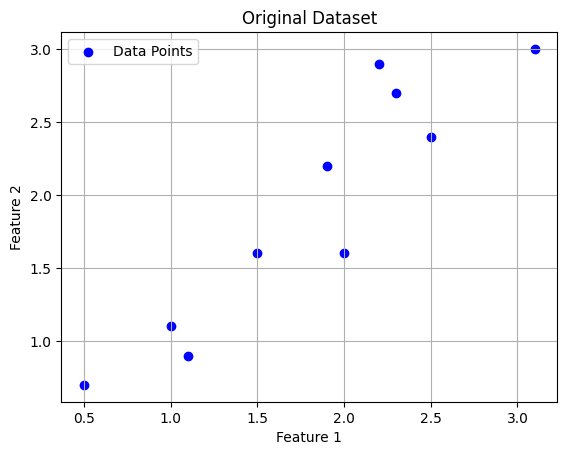

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Sample dataset: rows are data points, columns are features
X = np.array([[2.5, 2.4],
              [0.5, 0.7],
              [2.2, 2.9],
              [1.9, 2.2],
              [3.1, 3.0],
              [2.3, 2.7],
              [2, 1.6],
              [1, 1.1],
              [1.5, 1.6],
              [1.1, 0.9]])

# Step 1: Compute the covariance matrix of the dataset
# Center the data (subtract the mean of each feature)
X_centered = X - np.mean(X, axis=0)

# Covariance matrix computation
cov_matrix = np.cov(X_centered.T)  # We transpose to compute the covariance matrix

# Print the covariance matrix
print("Covariance Matrix:")
print(cov_matrix)

# Step 2: Visualize the original dataset
plt.scatter(X[:, 0], X[:, 1], color='blue', label='Data Points')
plt.title('Original Dataset')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.grid(True)
plt.legend()
plt.show()


#####**1.4.3.2 Principal component analysis**

Principal Component Analysis (PCA) is a dimensionality reduction technique used to simplify complex datasets by transforming them into a smaller set of variables while preserving most of the original data's variance. It identifies the directions, called **principal components**, along which the data varies the most and projects the data onto these directions, thereby reducing the number of variables while retaining key patterns. PCA computes these components by analyzing the covariance matrix and finding the eigenvectors and eigenvalues, with the principal components being orthogonal (uncorrelated). PCA is widely applied in data compression, noise reduction, and visualization of high-dimensional datasets.

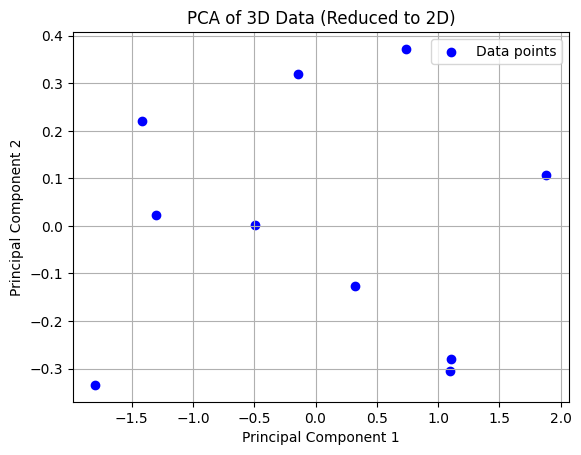

Explained Variance Ratio (Variance captured by each principal component):
[0.94509774 0.04096643]

Transformed Data (2 Principal Components):
[[ 0.74118297  0.37219708]
 [-1.79613989 -0.33440669]
 [ 1.10018748 -0.30485488]
 [ 0.32071049 -0.12603376]
 [ 1.88391882  0.10609896]
 [ 1.10885394 -0.27894768]
 [-0.14609235  0.3192951 ]
 [-1.30206918  0.02294784]
 [-0.49375251  0.00239533]
 [-1.41679976  0.2213087 ]]


In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Sample dataset: 10 data points with 3 features (dimensions)
X = np.array([[2.5, 2.4, 1.2],
              [0.5, 0.7, 0.8],
              [2.2, 2.9, 1.7],
              [1.9, 2.2, 1.4],
              [3.1, 3.0, 2.1],
              [2.3, 2.7, 1.9],
              [2.0, 1.6, 1.1],
              [1.0, 1.1, 0.6],
              [1.5, 1.6, 1.0],
              [1.1, 0.9, 0.5]])

# Step 1: Standardize the dataset (centering around the mean)
X_centered = X - np.mean(X, axis=0)

# Step 2: Perform PCA, reducing the dataset to 2 principal components
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_centered)

# Step 3: Visualize the result
plt.scatter(X_pca[:, 0], X_pca[:, 1], c='blue', marker='o', label='Data points')
plt.title('PCA of 3D Data (Reduced to 2D)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.legend()
plt.show()

# Step 4: Output the explained variance ratio (variance captured by each component)
print("Explained Variance Ratio (Variance captured by each principal component):")
print(pca.explained_variance_ratio_)

# Output the transformed data
print("\nTransformed Data (2 Principal Components):")
print(X_pca)


#####**1.4.3.3 Total Variance**

Total Variance refers to the sum of the variances of all original features in the dataset, which represents the total amount of variability present. When PCA is applied, this total variance is redistributed across the principal components, with each component capturing a portion of the variance. The explained variance ratio indicates how much of the total variance is captured by each component. The total variance is given by $\text{Total Variance} = \sum_{i=1}^{k} \lambda_i$, where $\lambda_i$ is the eigenvalue corresponding to the $i$-th principal component, and the sum of all eigenvalues represents the total variance in the data.

In [5]:
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Sample dataset: 5 data points with 3 features
X = np.array([[2.5, 2.4, 1.5],
              [0.5, 0.7, 0.3],
              [2.2, 2.9, 1.7],
              [1.9, 2.2, 1.2],
              [3.1, 3.0, 2.1]])

# Standardize the data (important for PCA when features have different scales)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform PCA
pca = PCA(n_components=3)  # Keep all 3 components
pca.fit(X_scaled)

# Total variance is the sum of explained variance
total_variance = np.sum(pca.explained_variance_)
explained_variance_ratio = pca.explained_variance_ratio_

# Print the total variance and explained variance ratio
print(f"Total Variance: {total_variance}")
print(f"Explained Variance Ratio for each component: {explained_variance_ratio}")

# Print cumulative explained variance (to show how much variance is explained by the components)
cumulative_variance = np.cumsum(explained_variance_ratio)
print(f"Cumulative Explained Variance: {cumulative_variance}")

Total Variance: 3.7500000000000018
Explained Variance Ratio for each component: [0.97658241 0.02014566 0.00327193]
Cumulative Explained Variance: [0.97658241 0.99672807 1.        ]
